In [5]:
# TO INCREASE TERMINAL WIDTH SIZE
import pandas as pd
import numpy as np

# Remove width limits
pd.set_option('display.max_rows', None)             # Show all rows
pd.set_option('display.max_columns', None)          # Show all columns
pd.set_option('display.width', 1000)                # Increase display width
pd.set_option('display.max_colwidth', None)         # Full column content
pd.set_option('display.expand_frame_repr', False)   # Prevent line wrapping


## Project - Health Data Analysis Report

In [13]:
import pandas as pd 
import numpy as np

# Load the CSV
df = pd.read_csv("health_data.csv") 

# Check for Null Values
nulls = df.isnull().sum()
print("-> Total nulls values are -:")
print(nulls)

# Handling the Null Values
df2 = df
# Handling Null Values for Age
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

# Handling Null Values for Gender
df2['Gender'] = df2['Gender'].fillna(df2['Gender'].mode()[0])

# Handling Null Values for Blood Pressure
df2['Blood Pressure'] = df2['Blood Pressure'].fillna(df2['Blood Pressure'].mean())

# Handling Null Values for Cholestrol
df2['Cholesterol'] = df2['Cholesterol'].fillna(df2['Cholesterol'].mean())

# Handling Null Values for BMI
df2['BMI'] = df2['BMI'].fillna(df2['BMI'].mean())

# Handling Null Values for Glucose Level
df2['Glucose Level'] = df2['Glucose Level'].fillna(df2['Glucose Level'].mean())

# Handling Null Values for Smoker
df2['Smoker'] = df2['Smoker'].fillna(df2['Smoker'].mode()[0])

# Handling Null Values for Physical Activity (hrs/week)
df2['Physical Activity (hrs/week)'] = df2['Physical Activity (hrs/week)'].fillna(df2['Physical Activity (hrs/week)'].mean())

# Handling Null Values for Health Risk Score
df2['Health Risk Score'] = df2['Health Risk Score'].fillna(df2['Health Risk Score'].mean())

# Total number of males and females
number_gender = df2.groupby('Gender')['Gender'].count()
print("\n-> Total Number of Males and Females -:")
print(number_gender)

# How many people are smokers vs non-smokers
number_smoker = df2.groupby('Smoker')['Smoker'].count()
print("\n-> Total Number of people who are smoker and non-smoker -:")
print(number_smoker)

# Average BMI by Gender
average_bmi = df2.groupby('Gender')['BMI'].mean()
print("\n-> Average BMI by gender -:")
print(average_bmi)

# Maximum BMI by Gender
max_bmi = df2.groupby('Gender')['BMI'].max()
print("\n-> Maximum BMI by gender -:")
print(max_bmi)

# Minimum BMI by Gender
min_bmi = df2.groupby('Gender')['BMI'].min()
print("\n-> Minimum BMI by gender -:")
print(min_bmi)

# Adding a column for BMI Category
condition = [
    (df2['BMI'] < 18.5),
    (df2['BMI'] >= 18.5) & (df2['BMI'] <= 24.9),
    (df2['BMI'] >= 25.0) & (df2['BMI'] <= 29.9),
    (df2['BMI'] >= 30)
]
bmi_category = ["Underweight", "Normal", "Overweight", "Obese"]

df2['BMI Category'] = np.select(condition, bmi_category)
print("\n-> A new column is added named BMI Category. You can access it in your project folder.")

# 🩸 Average Blood Pressure by Gender
average_BP = df2.groupby('Gender')['Blood Pressure'].mean()
print("\n-> Average Blood Pressure by gender -:")
print(average_BP)

# Compare Cholesterol levels for smokers vs non-smokers
number_choles = df2.groupby('Smoker')['Cholesterol'].mean()
print("\n-> Comparision of Cholesterol levels for smokers vs non-smokers -:")
print(number_choles)

# Top 5 people with highest Health Risk Score
top_risk = df2.sort_values("Health Risk Score", ascending = False)
print("\n-> Top 5 people with highest Health Risk Score -:")
print(top_risk[['Age', 'Gender', 'Health Risk Score']].head().reset_index(drop = True))

# Create a column: "Is High Risk" (Yes/No) ❗
conditionHigh = [
    (df['Health Risk Score'] > 80),
    (df['Health Risk Score'] <= 80)
]
is_highRisk = ['Yes', 'No']
df2['Is High Risk'] = np.select(conditionHigh, is_highRisk)
print("\n-> A new column is added named {Is High Risk}. You can access it in your project folder.")

# Average Health Risk Score for Male Smokers vs Female Smokers 🚬
average_risk = df2.groupby(['Gender', 'Smoker'])['Health Risk Score'].mean()
print("\n-> Average Health Risk Score for Male Smokers vs Female Smokers 🚬 -:")
print(average_risk)

# Create Activity Category Column 🏃‍♂️
activity_condition = [
    (df2['Physical Activity (hrs/week)'] < 2),
    (df2['Physical Activity (hrs/week)'] > 2) & (df2['Physical Activity (hrs/week)'] <= 5),
    (df2['Physical Activity (hrs/week)'] > 5)
]
activity_label = ["Low", "Medium", "High"]
df2['Activity Level'] = np.select(activity_condition, activity_label)
print("\n-> A new column is added named Activity Level. You can access it in your project folder.")

# Calculate average Health Risk Score
mean_activty = df2.groupby('Activity Level')['Health Risk Score'].mean()
print("\n-> Average Health Risk Score -:")
print(mean_activty)

# Exporting it
export = df2.to_csv("Cleaned_Data.csv", index = False)
print("\nCleaned Data Exported Successfully. You can access it in the project folder.")

-> Total nulls values are -:
Age                             30
Gender                          30
Blood Pressure                  30
Cholesterol                     30
BMI                             30
Glucose Level                   30
Smoker                          30
Physical Activity (hrs/week)    30
Health Risk Score               30
dtype: int64

-> Total Number of Males and Females -:
Gender
Female    174
Male      126
Name: Gender, dtype: int64

-> Total Number of people who are smoker and non-smoker -:
Smoker
No     171
Yes    129
Name: Smoker, dtype: int64

-> Average BMI by gender -:
Gender
Female    25.418616
Male      25.466002
Name: BMI, dtype: float64

-> Maximum BMI by gender -:
Gender
Female    37.4
Male      37.7
Name: BMI, dtype: float64

-> Minimum BMI by gender -:
Gender
Female    14.6
Male      15.1
Name: BMI, dtype: float64

-> A new column is added named BMI Category. You can access it in your project folder.

-> Average Blood Pressure by gender -:
Gender
Fem

### 🥧 Pie Chart: BMI Category Distribution

Text(0.5, 1.0, 'Categorise Wise Distribution')

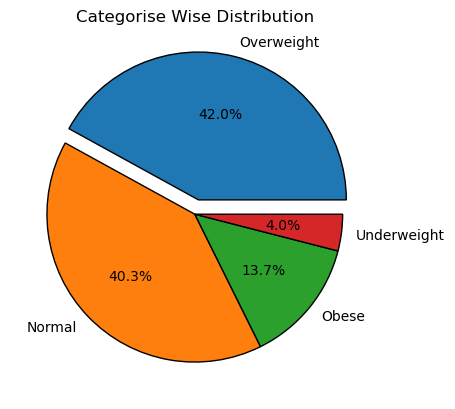

In [7]:
import matplotlib.pyplot as plt
bmiCategory = df2['BMI Category'].value_counts()
explode = [0.1, 0, 0, 0]
plt.pie(bmiCategory.values, labels = bmiCategory.index, autopct = "%1.1f%%", wedgeprops = {"edgecolor" : "black"}, explode = explode)
plt.title("Categorise Wise Distribution")

### 📉 Line Chart: Age vs Health Risk Score

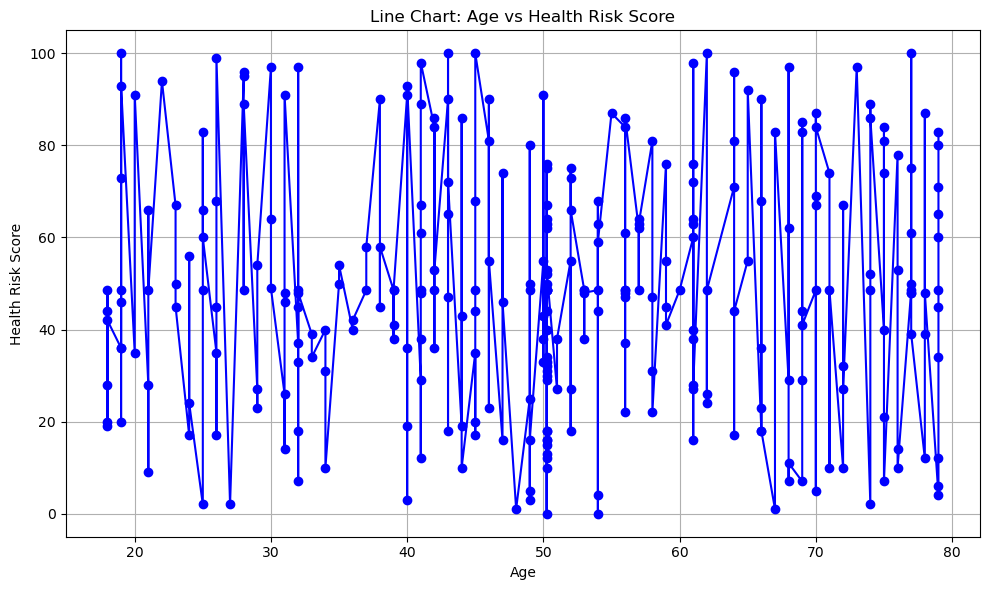

In [8]:
sort_age = df2.sort_values('Age')
plot_age = sort_age['Age']
plot_risk = sort_age['Health Risk Score']
plt.figure(figsize = (10 ,6))
plt.plot(plot_age, plot_risk, marker = 'o', color = 'blue')
plt.title("Line Chart: Age vs Health Risk Score")
plt.xlabel("Age")
plt.ylabel("Health Risk Score")
plt.grid(True)
plt.tight_layout()

### 📊 Bar Chart: Gender vs Average BMI

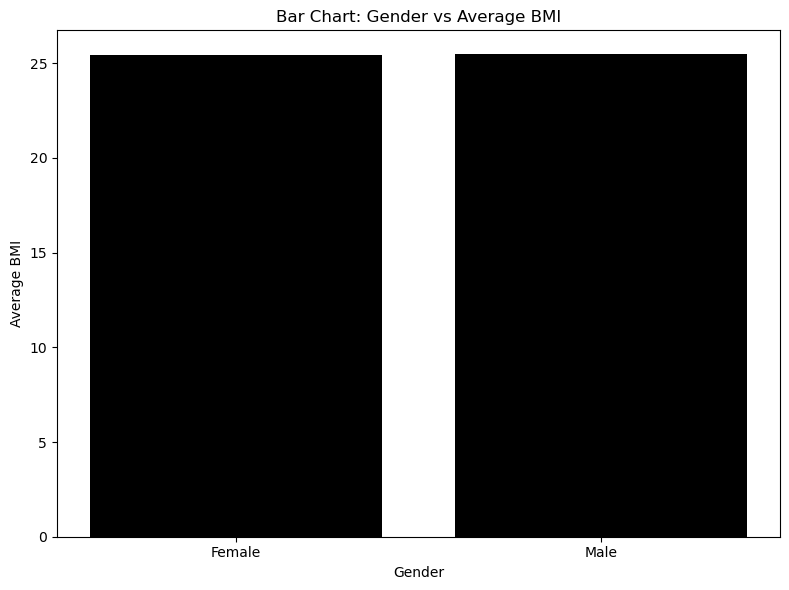

In [9]:
plt.figure(figsize = (8, 6))
plt.bar(average_bmi.index, average_bmi.values, color = 'black')
plt.title("Bar Chart: Gender vs Average BMI")
plt.xlabel("Gender")
plt.ylabel("Average BMI")
plt.tight_layout()

### ⚡ Scatter Plot: Cholesterol vs BMI

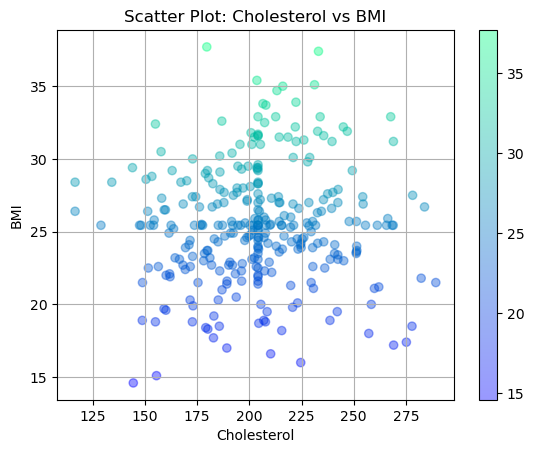

In [10]:
plot_cholest = df2['Cholesterol']
plot_BMI = df2['BMI']
plt.scatter(plot_cholest, plot_BMI, c = plot_BMI, alpha = 0.4, cmap = 'winter')
plt.colorbar()
plt.xlabel("Cholesterol")
plt.ylabel("BMI")
plt.title("Scatter Plot: Cholesterol vs BMI")
plt.grid(True)


### 🧮 Histogram: Blood Pressure Distribution

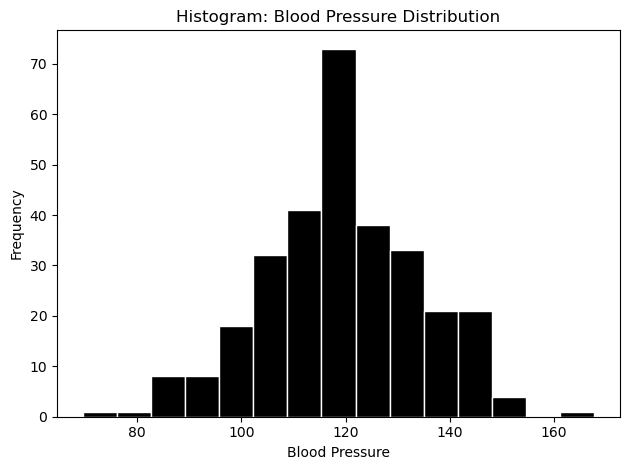

In [14]:
plot_blood = df2['Blood Pressure']
plt.hist(plot_blood, bins = 15, edgecolor = 'white', color = 'black')
plt.title("Histogram: Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.tight_layout()

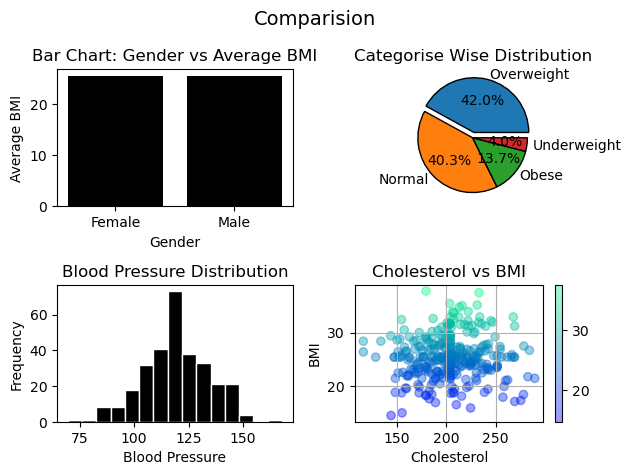

In [28]:
plt.subplot(2, 2, 1)
plt.bar(average_bmi.index, average_bmi.values, color = 'black')
plt.title("Bar Chart: Gender vs Average BMI")
plt.xlabel("Gender")
plt.ylabel("Average BMI")
plt.tight_layout()

plt.subplot(2, 2, 2)
bmiCategory = df2['BMI Category'].value_counts()
explode = [0.1, 0, 0, 0]
plt.pie(bmiCategory.values, labels = bmiCategory.index, autopct = "%1.1f%%", wedgeprops = {"edgecolor" : "black"}, explode = explode)
plt.title("Categorise Wise Distribution")
plt.tight_layout()

plt.subplot(2, 2, 3)
plot_blood = df2['Blood Pressure']
plt.hist(plot_blood, bins = 15, edgecolor = 'white', color = 'black')
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(2, 2, 4)
plot_cholest = df2['Cholesterol']
plot_BMI = df2['BMI']
plt.scatter(plot_cholest, plot_BMI, c = plot_BMI, alpha = 0.4, cmap = 'winter')
plt.colorbar()
plt.xlabel("Cholesterol")
plt.ylabel("BMI")
plt.title("Cholesterol vs BMI")
plt.grid(True)
plt.suptitle("Comparision", fontsize = 14)
plt.tight_layout()